In [290]:
import pandas as pd
import matplotlib.pyplot as plt

csvFileName = "AppleWatchHR.csv"

AppleWatchHRDf = pd.read_csv(csvFileName, 
                             index_col="sampleDT", 
                             parse_dates=["sampleDT", "creationDate"])

Text(0.5, 0, 'BPM')

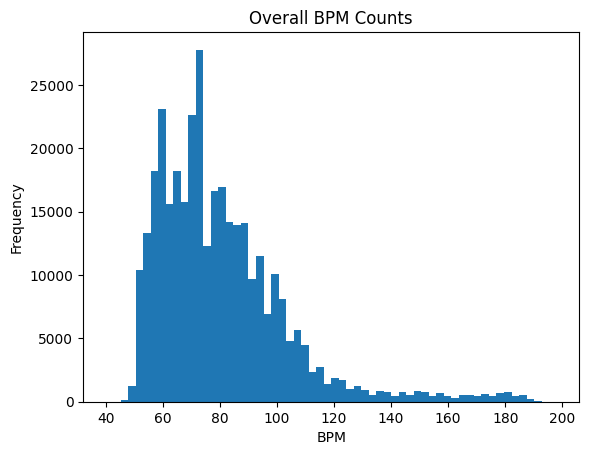

In [222]:
ax = AppleWatchHRDf.value.plot.hist(bins=60, title="Overall BPM Counts")
ax.set_xlabel("BPM")


In [23]:
AppleWatchHRDf

,hardware,software,creationDate,value
SampleDT,,,,
2021-07-19 19:55:06-07:00,Watch6,7.6,2021-07-19 19:55:07-07:00,78.0
2021-07-19 19:55:11-07:00,Watch6,7.6,2021-07-19 19:55:12-07:00,79.0
2021-07-19 19:55:14-07:00,Watch6,7.6,2021-07-19 19:55:17-07:00,80.0
2021-07-19 19:55:21-07:00,Watch6,7.6,2021-07-19 19:55:22-07:00,82.0
2021-07-19 19:55:23-07:00,Watch6,7.6,2021-07-19 19:55:27-07:00,83.0
...,...,...,...,...
2024-07-17 06:04:35-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,54.0
2024-07-17 06:08:51-07:00,Watch6,10.4,2024-07-17 06:10:58-07:00,55.0
2024-07-17 06:10:52-07:00,Watch6,10.4,2024-07-17 06:24:44-07:00,54.0


In [296]:
AppleWatchHRDf = AppleWatchHRDf.sort_index()

In [297]:
timesSeries = pd.Series(AppleWatchHRDf.index)

In [298]:
betweenMesures = ((timesSeries.shift(-1) - timesSeries)).astype('timedelta64[s]')

In [299]:
betweenMesures

0           5.0
1           3.0
2           7.0
3           2.0
4           7.0
          ...  
341781    256.0
341782    121.0
341783    522.0
341784     87.0
341785      NaN
Name: SampleDT, Length: 341786, dtype: float64

In [300]:
AppleWatchHRDf["timeToNextReading"] = pd.Series(index=AppleWatchHRDf.index, data=betweenMesures.values)

In [301]:
betweenMesures = betweenMesures.dropna()

In [302]:
AppleWatchHRDf = AppleWatchHRDf.dropna()

In [178]:
AppleWatchHRDf

,hardware,software,creationDate,value,timeToNextReading
SampleDT,,,,,
2021-07-19 19:55:06-07:00,Watch6,7.6,2021-07-19 19:55:07-07:00,78.0,5.0
2021-07-19 19:55:11-07:00,Watch6,7.6,2021-07-19 19:55:12-07:00,79.0,3.0
2021-07-19 19:55:14-07:00,Watch6,7.6,2021-07-19 19:55:17-07:00,80.0,7.0
2021-07-19 19:55:21-07:00,Watch6,7.6,2021-07-19 19:55:22-07:00,82.0,2.0
2021-07-19 19:55:23-07:00,Watch6,7.6,2021-07-19 19:55:27-07:00,83.0,7.0
...,...,...,...,...,...
2024-07-17 05:54:54-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,55.0,581.0
2024-07-17 06:04:35-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,54.0,256.0
2024-07-17 06:08:51-07:00,Watch6,10.4,2024-07-17 06:10:58-07:00,55.0,121.0


In [179]:
betweenMesures = betweenMesures.sort_values()

In [180]:
betweenMesures

245533          0.0
120425          0.0
33324           0.0
65835           0.0
61101           0.0
            ...    
251595     467762.0
101973     532096.0
292714     787236.0
313984     821233.0
294601    1242634.0
Name: SampleDT, Length: 341785, dtype: float64

Text(0.5, 0, 'Interval (sec)')

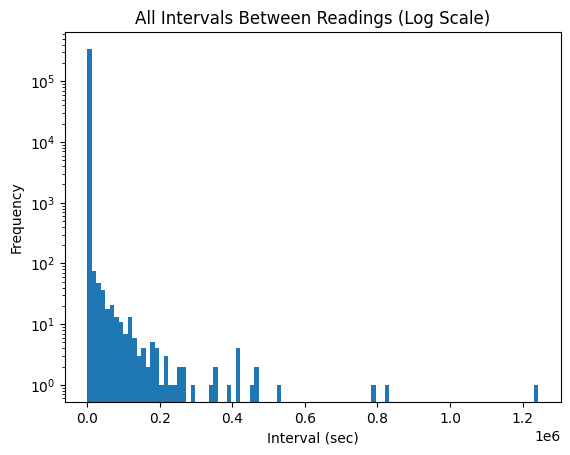

In [250]:
ax = betweenMesures.plot.hist(bins=100, log=True, title="All Intervals Between Readings (Log Scale)")
ax.set_xlabel("Interval (sec)")

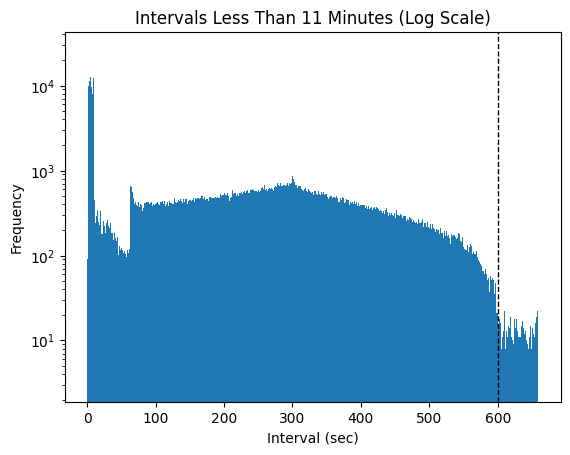

In [327]:
ax = betweenMesures.loc[betweenMesures<660].plot.hist(bins=659, log=True, title="Intervals Less Than 11 Minutes (Log Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(600, color='k', linestyle='dashed', linewidth=1)

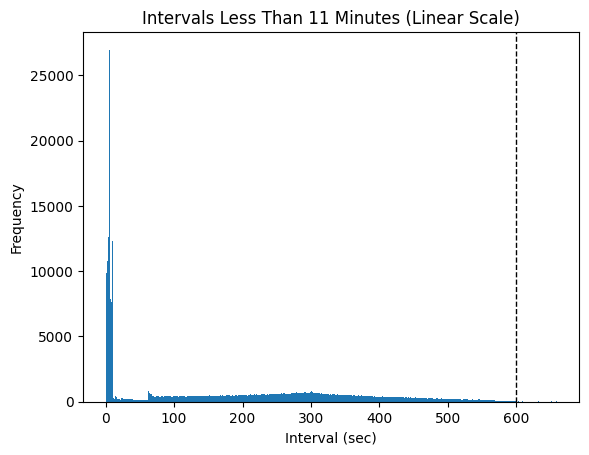

In [328]:
ax = betweenMesures.loc[betweenMesures<660].plot.hist(bins=659, title="Intervals Less Than 11 Minutes (Linear Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(600, color='k', linestyle='dashed', linewidth=1)

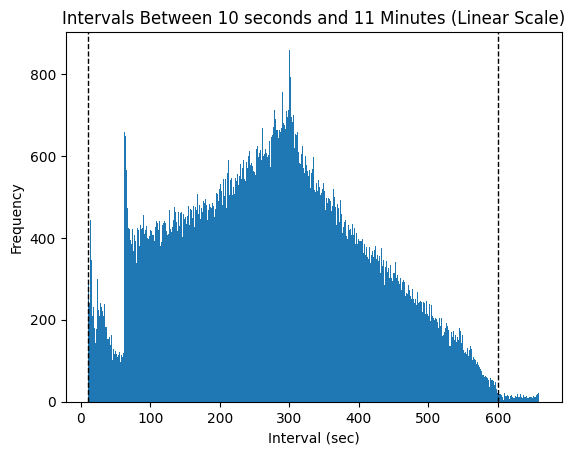

In [303]:
ax = betweenMesures.loc[betweenMesures<660].loc[betweenMesures>10].plot.hist(bins=648, title="Intervals Between 10 seconds and 11 Minutes (Linear Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(10, color='k', linestyle='dashed', linewidth=1)
ax.axvline(600, color='k', linestyle='dashed', linewidth=1)

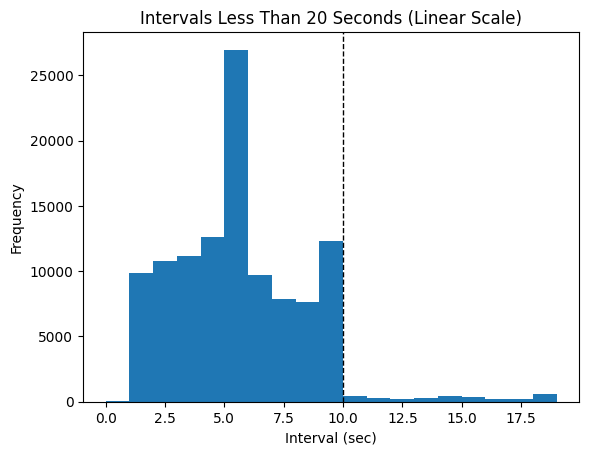

In [247]:
ax = betweenMesures.loc[betweenMesures<20].plot.hist(bins=19, title="Intervals Less Than 20 Seconds (Linear Scale)")
ax.set_xlabel("Interval (sec)")
ax.axvline(10, color='k', linestyle='dashed', linewidth=1)

In [186]:
betweenMesures.describe()

count    3.417850e+05
mean     2.764099e+02
std      4.524496e+03
min      0.000000e+00
25%      7.000000e+00
50%      1.790000e+02
75%      3.240000e+02
max      1.242634e+06
Name: SampleDT, dtype: float64

In [187]:
AppleWatchHRDf[AppleWatchHRDf["timeToNextReading"] < 10].value.describe()

count    109027.000000
mean        101.174488
std          25.113690
min          42.000000
25%          85.000000
50%          95.000000
75%         108.000000
max         198.000000
Name: value, dtype: float64

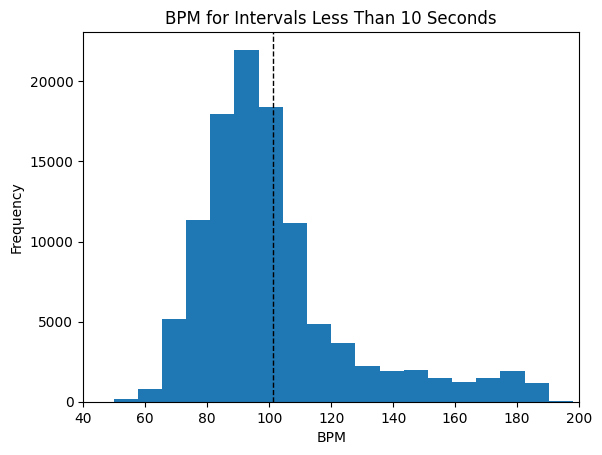

In [270]:
workOutBPMdf = AppleWatchHRDf[AppleWatchHRDf["timeToNextReading"] < 10]
ax = workOutBPMdf.value.plot.hist(bins=20, xlim=(40,200), title="BPM for Intervals Less Than 10 Seconds")
ax.set_xlabel("BPM")
ax.axvline(AppleWatchHRDf[AppleWatchHRDf["timeToNextReading"] < 10].value.mean(), color='k', linestyle='dashed', linewidth=1)

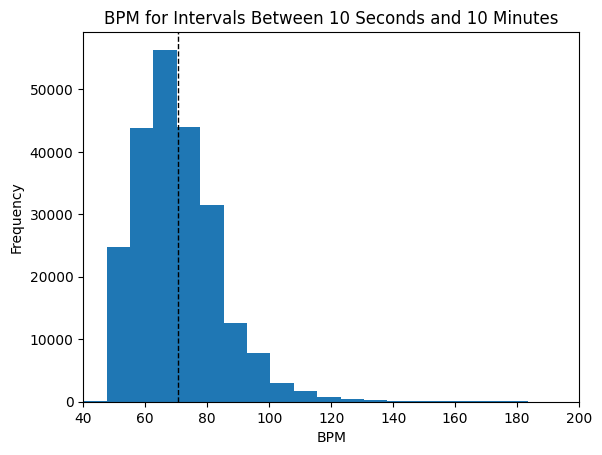

In [315]:
standByBPMdf = AppleWatchHRDf.loc[(AppleWatchHRDf["timeToNextReading"] >= 10) &
                        (AppleWatchHRDf["timeToNextReading"] < 600)]

ax = standByBPMdf.value.plot.hist(bins=20, xlim=(40,200), title="BPM for Intervals Between 10 Seconds and 10 Minutes")
ax.set_xlabel("BPM")
ax.axvline(standByBPMdf.value.mean(), color='k', linestyle='dashed', linewidth=1)

(40.0, 200.0)

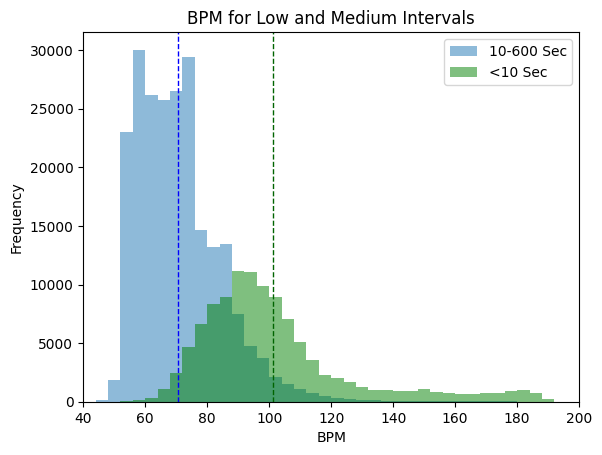

In [325]:
# plt.hist()
ax = standByBPMdf.value.plot.hist(bins=[x for x in range(40,201, (200-40)//40)], xlim=(40,200), alpha=0.5, label="10-600 Sec", title="BPM for Low and Medium Intervals")
ax.hist(workOutBPMdf.value, bins=[x for x in range(40,201, (200-40)//40)], alpha=0.5, color="g", label="<10 Sec")
ax.set_xlabel("BPM")
ax.axvline(standByBPMdf.value.mean(), color='b', linestyle='dashed', linewidth=1)
ax.axvline(workOutBPMdf.value.mean(), color='darkgreen', linestyle='dashed', linewidth=1)
ax.legend(loc='upper right') 
ax.set_xlim(40,200)

In [271]:
combodf = pd.DataFrame(workOutBPMdf.append(standByBPMdf))
combodf

,hardware,software,creationDate,value,timeToNextReading
SampleDT,,,,,
2021-07-19 19:55:06-07:00,Watch6,7.6,2021-07-19 19:55:07-07:00,78.0,5.0
2021-07-19 19:55:11-07:00,Watch6,7.6,2021-07-19 19:55:12-07:00,79.0,3.0
2021-07-19 19:55:14-07:00,Watch6,7.6,2021-07-19 19:55:17-07:00,80.0,7.0
2021-07-19 19:55:21-07:00,Watch6,7.6,2021-07-19 19:55:22-07:00,82.0,2.0
2021-07-19 19:55:23-07:00,Watch6,7.6,2021-07-19 19:55:27-07:00,83.0,7.0
...,...,...,...,...,...
2024-07-17 05:54:54-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,55.0,581.0
2024-07-17 06:04:35-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,54.0,256.0
2024-07-17 06:08:51-07:00,Watch6,10.4,2024-07-17 06:10:58-07:00,55.0,121.0


In [272]:
combodf["highR"] = combodf["timeToNextReading"] < 10
combodf

,hardware,software,creationDate,value,timeToNextReading,highR
SampleDT,,,,,,
2021-07-19 19:55:06-07:00,Watch6,7.6,2021-07-19 19:55:07-07:00,78.0,5.0,True
2021-07-19 19:55:11-07:00,Watch6,7.6,2021-07-19 19:55:12-07:00,79.0,3.0,True
2021-07-19 19:55:14-07:00,Watch6,7.6,2021-07-19 19:55:17-07:00,80.0,7.0,True
2021-07-19 19:55:21-07:00,Watch6,7.6,2021-07-19 19:55:22-07:00,82.0,2.0,True
2021-07-19 19:55:23-07:00,Watch6,7.6,2021-07-19 19:55:27-07:00,83.0,7.0,True
...,...,...,...,...,...,...
2024-07-17 05:54:54-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,55.0,581.0,False
2024-07-17 06:04:35-07:00,Watch6,10.4,2024-07-17 06:06:12-07:00,54.0,256.0,False
2024-07-17 06:08:51-07:00,Watch6,10.4,2024-07-17 06:10:58-07:00,55.0,121.0,False


AttributeError: module 'seaborn' has no attribute 'axvline'

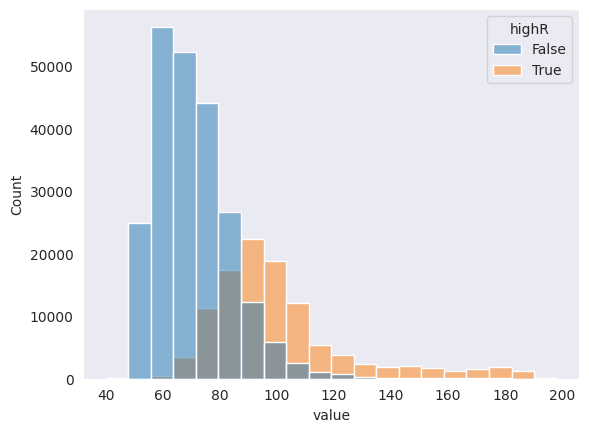

In [280]:
# import seaborn as sns
# sns.set_style("dark")
# sns.histplot(data=combodf, x="value", hue="highR", bins=20)
# sns.axvline(standByBPMdf.value.mean(), color='k', linestyle='dashed', linewidth=1)

In [197]:
AppleWatchHRDf.loc[(AppleWatchHRDf["timeToNextReading"] >= 10) &
                   (AppleWatchHRDf["timeToNextReading"] < 600)].value.describe()

count    227624.000000
mean         70.504512
std          13.705998
min          40.000000
25%          60.000000
50%          69.000000
75%          78.000000
max         191.000000
Name: value, dtype: float64

In [292]:
import matplotlib as mpl

mpl.rc_file_defaults()